# xlseries use cases

This notebook shows the most common use cases applied to some of the currently passing test cases.

## Imports

In [1]:
# the user only uses this single class
from xlseries import XlSeries

# import methods to load parameters and test cases
from xlseries.utils.case_loaders import load_original_case, load_critical_parameters_case
from xlseries.utils.path_finders import get_orig_cases_path, get_param_cases_path

# import methods to nicely print the inputs in this notebook
from xlseries.utils.xl_methods import print_xl_range
from xlseries.utils.path_finders import get_screenshot_cases_path
from IPython.display import Image
from pprint import pprint as pp

## Test case 1

*Let's load and take a look of the inputs first*

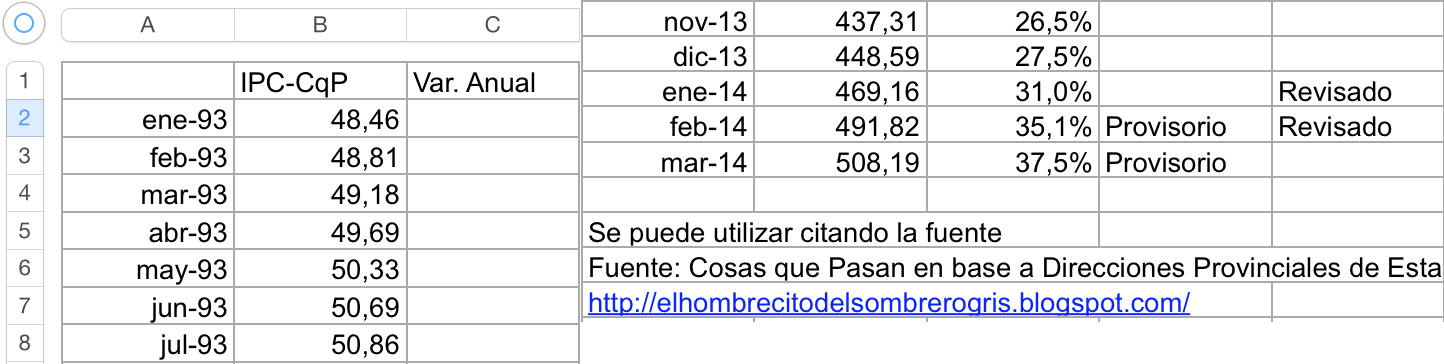

In [2]:
# load excel file to parse 
wb = load_original_case(1)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("1_ab"), height=200)

In [3]:
# load parameters to tell the parser how to do it
# we will use only the critical paramaters needed, all of those that are `None` (without list) will be guessed
params = load_critical_parameters_case(1)
pp(params)

{'alignment': None,
 'blank_rows': None,
 'continuity': None,
 'data_ends': [None, None],
 'data_starts': [2, 2],
 'frequency': [u'M', u'M'],
 'headers_coord': [u'B1', u'C1'],
 'missing_value': None,
 'missings': None,
 'series_names': [None, None],
 'time_alignment': [0, 0],
 'time_composed': None,
 'time_header_coord': [u'A1', u'A1'],
 'time_multicolumn': None}


In [4]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

In [5]:
print "Number of data frames parsed:", len(dfs)

df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

Number of data frames parsed: 1


,IPC-CqP,Var. Anual
1993-01,48.456885,NaN
1993-02,48.810834,NaN
1993-03,49.177819,NaN
1993-04,49.691889,NaN
1993-05,50.331205,NaN
1993-06,50.693241,NaN
1993-07,50.856318,NaN
1993-08,50.864473,NaN
1993-09,51.283639,NaN
1993-10,51.573538,NaN


## Test case 2

*Let's load and take a look of the inputs first*

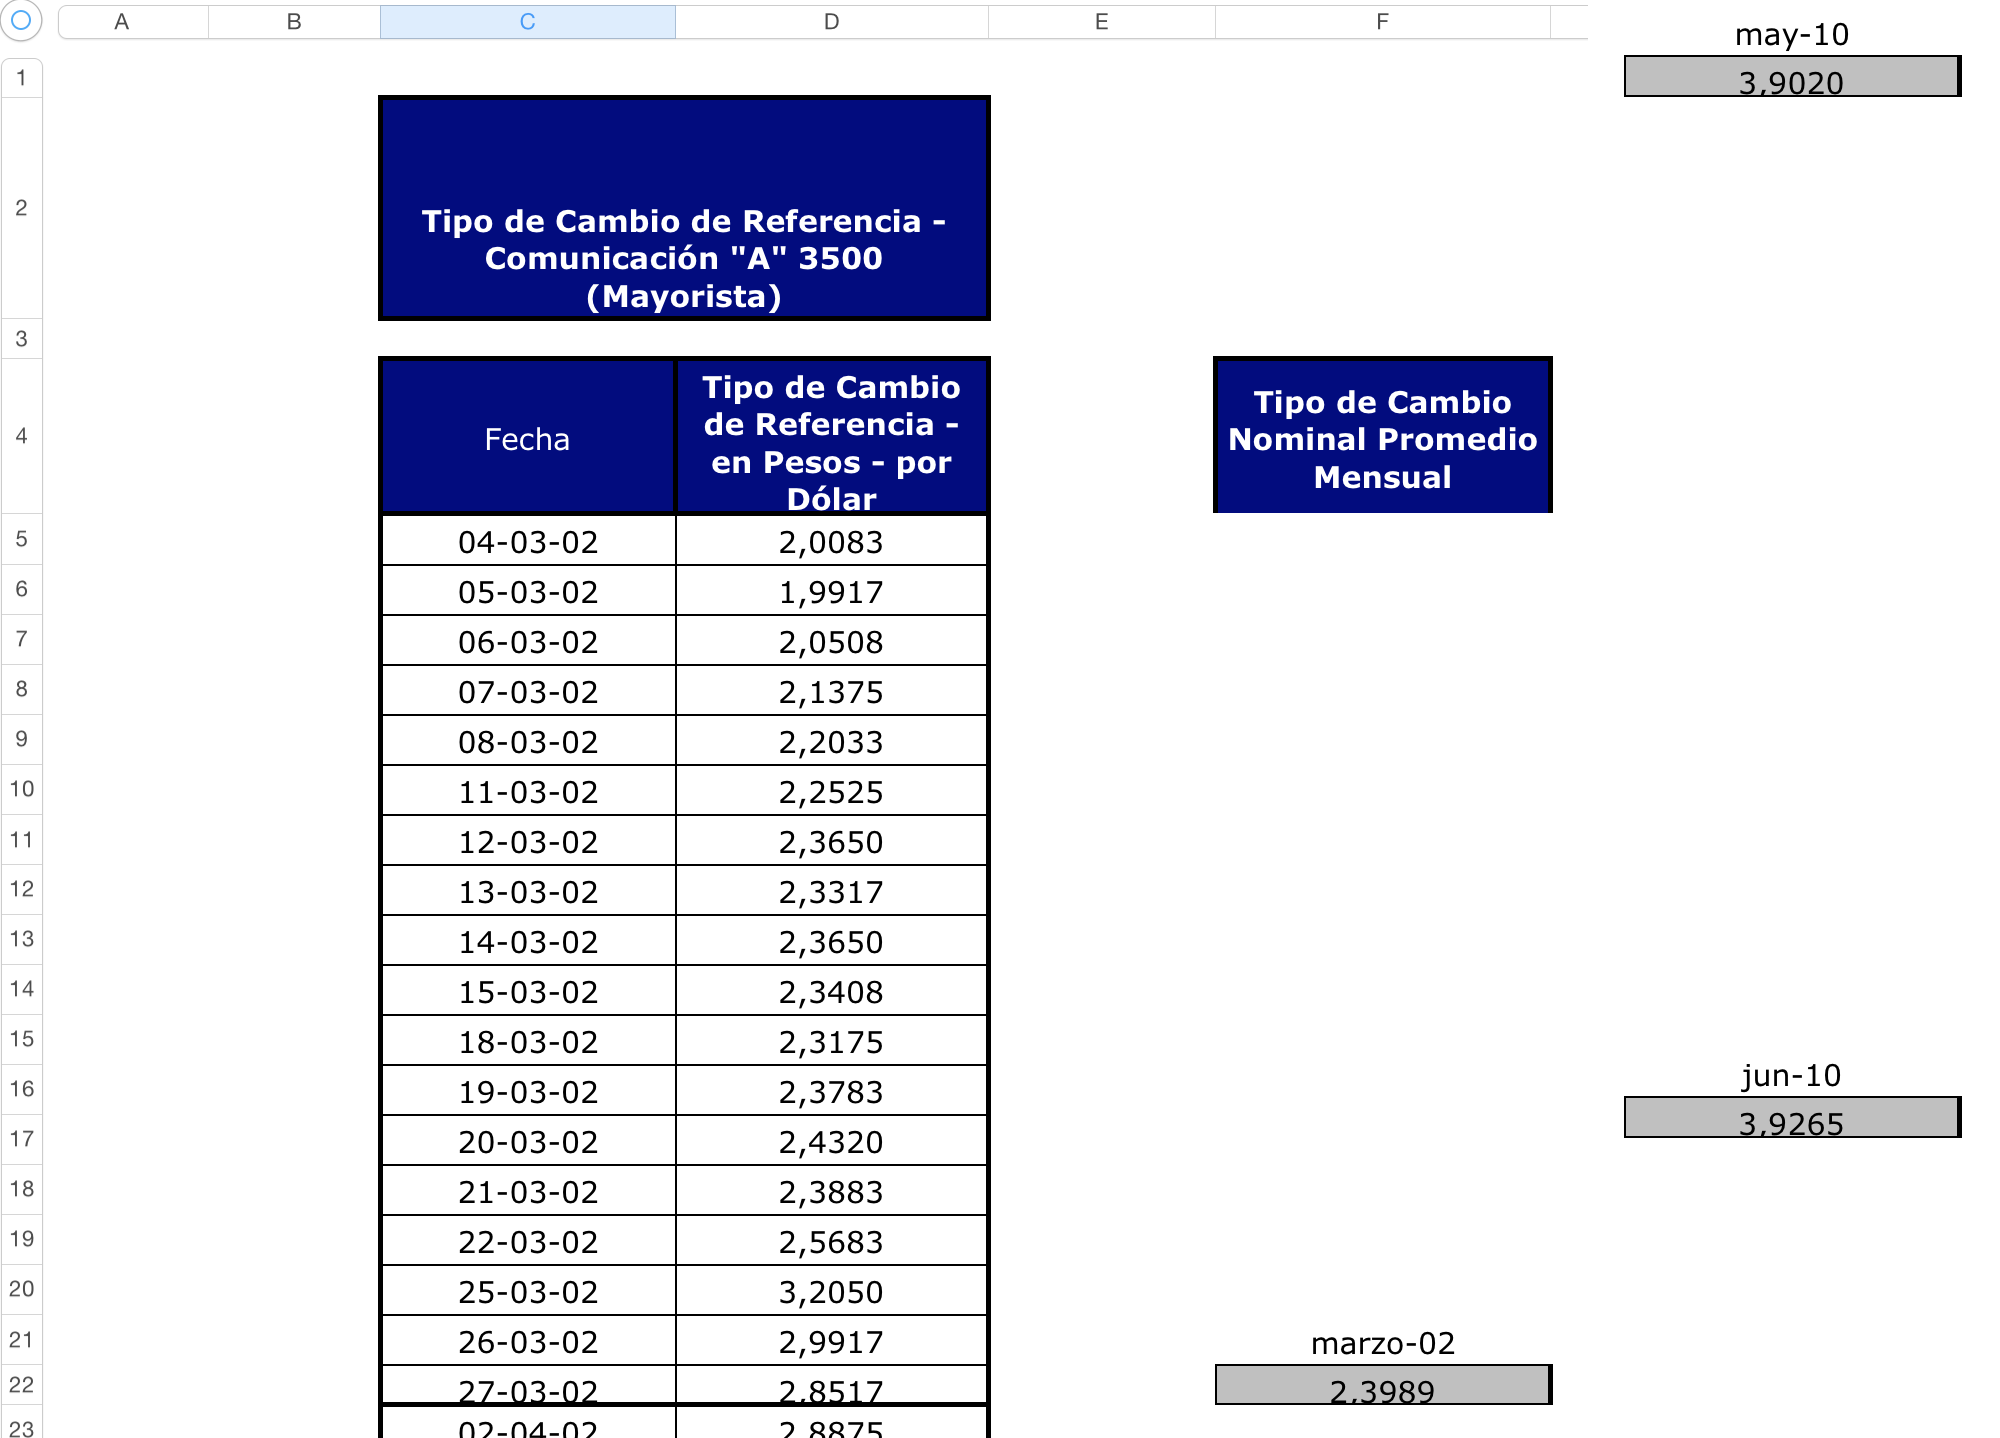

In [6]:
# load excel file to parse 
wb = load_original_case(2)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("2_ed"), height=600)

*In this case there are **mistakes** in the time index values*

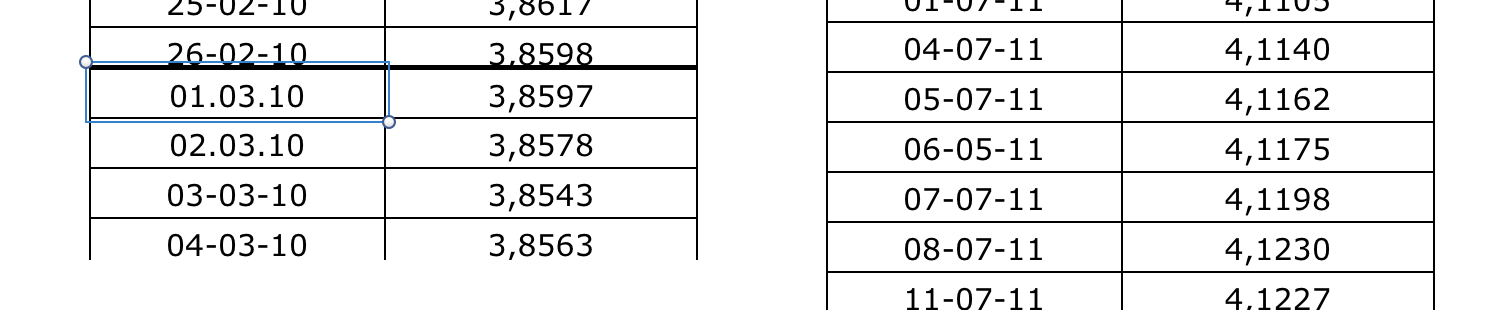

In [7]:
Image(filename=get_screenshot_cases_path("2_bc"), height=200)

*On the left, there are some date values with different separators. Those ones are not parsed by `openpyxl` as datetime.datetime but as strings.*

*On the right, there is a mistake in the month of the day number 6, that should be **07** *

In [8]:
# load parameters to tell the parser how to do it
params = load_critical_parameters_case(2)
pp(params)

{'alignment': None,
 'blank_rows': [False, True],
 'continuity': [True, False],
 'data_ends': [None, None],
 'data_starts': [5, 22],
 'frequency': [u'D', u'M'],
 'headers_coord': [u'D4', u'F4'],
 'missing_value': [u'Implicit', None],
 'missings': [True, False],
 'series_names': [None, None],
 'time_alignment': [0, -1],
 'time_composed': None,
 'time_header_coord': [u'C4', u'F4'],
 'time_multicolumn': None}


In [9]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 2


*First, we print the **daily** data frame*

In [10]:
df = dfs[0]  # [Number of data frame][0=evaluation_ratio, 1=data_frame]
df[:10]  # [Slicing data frame rows]

,Tipo de Cambio de Referencia - en Pesos - por Dolar
2002-03-04,2.0083
2002-03-05,1.9917
2002-03-06,2.0508
2002-03-07,2.1375
2002-03-08,2.2033
2002-03-09,NaN
2002-03-10,NaN
2002-03-11,2.2525
2002-03-12,2.3650
2002-03-13,2.3317


*Now, we print the **monthly** data frame*

In [11]:
df = dfs[1]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,Tipo de Cambio Nominal Promedio Mensual
2002-03,2.398856
2002-04,2.855106
2002-05,3.328700
2002-06,3.621300
2002-07,3.607136
2002-08,3.620710
2002-09,3.643076
2002-10,3.651882
2002-11,3.525550
2002-12,3.490171


## Test case 3

*Let's load and take a look of the inputs first*

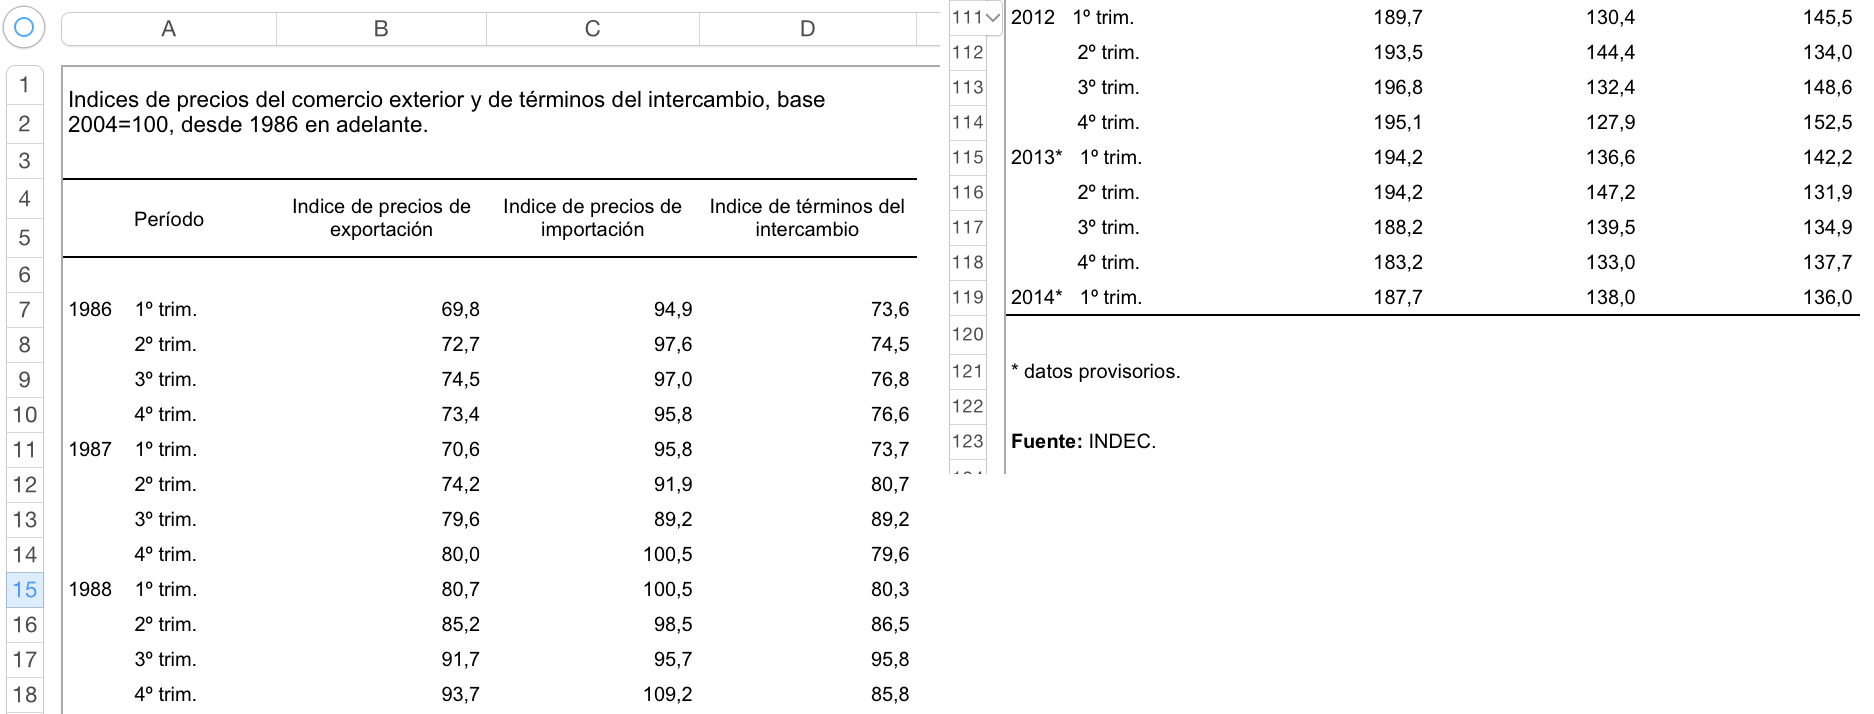

In [12]:
# load excel file to parse 
wb = load_original_case(3)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("3_ab"), width=900)

In [13]:
# load parameters to tell the parser how to do it
params = load_critical_parameters_case(3)
pp(params)

{'alignment': None,
 'blank_rows': None,
 'continuity': None,
 'data_ends': [None, None, None],
 'data_starts': [7, 7, 7],
 'frequency': [u'Q', u'Q', u'Q'],
 'headers_coord': [u'B4', u'C4', u'D4'],
 'missing_value': None,
 'missings': None,
 'series_names': [None, None, None],
 'time_alignment': [0, 0, 0],
 'time_composed': None,
 'time_header_coord': [u'A4', u'A4', u'A4'],
 'time_multicolumn': None}


In [14]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 1


In [15]:
df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,Indice de precios de exportacion,Indice de precios de importacion,Indice de terminos del intercambio
1986Q1,69.8,94.9,73.551106
1986Q2,72.7,97.6,74.487705
1986Q3,74.5,97.0,76.804124
1986Q4,73.4,95.8,76.617954
1987Q1,70.6,95.8,73.695198
1987Q2,74.2,91.9,80.739935
1987Q3,79.6,89.2,89.237668
1987Q4,80.0,100.5,79.601990
1988Q1,80.7,100.5,80.298507
1988Q2,85.2,98.5,86.497462


## Test case 4

*Let's load and take a look of the inputs first*

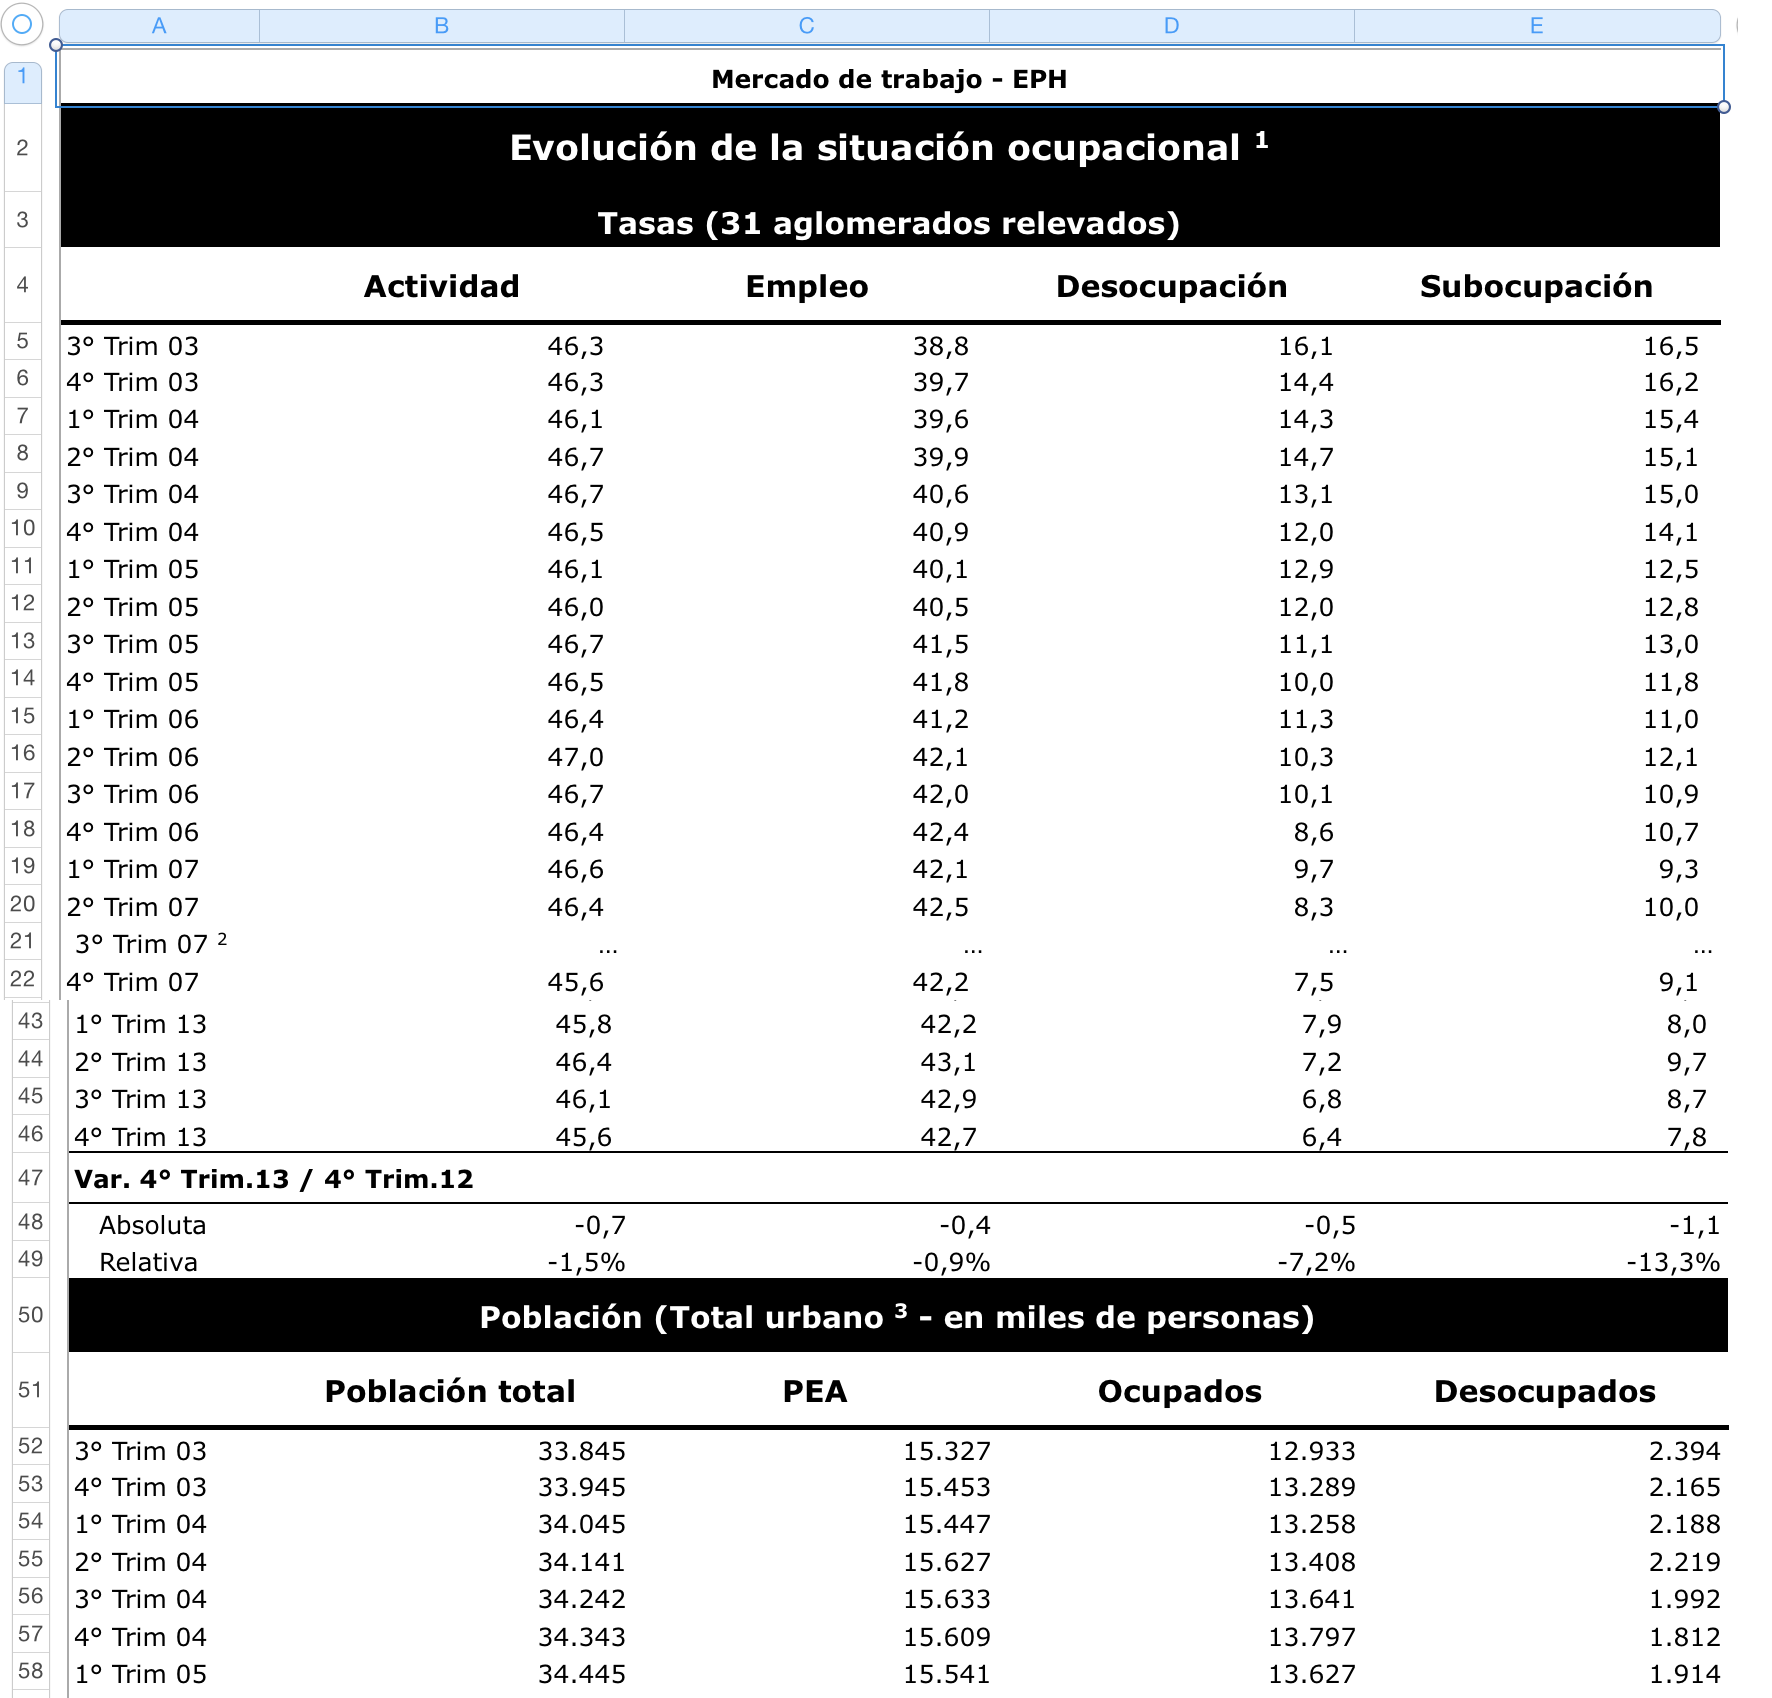

In [16]:
# load excel file to parse 
wb = load_original_case(4)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("4_ab"), width=900)

In [17]:
# load parameters to tell the parser how to do it
params = load_critical_parameters_case(4)
pp(params)

{'alignment': None,
 'blank_rows': None,
 'continuity': None,
 'data_ends': [None, None, None, None, None, None, None, None],
 'data_starts': [5, 5, 5, 5, 52, 52, 52, 52],
 'frequency': [u'Q', u'Q', u'Q', u'Q', u'Q', u'Q', u'Q', u'Q'],
 'headers_coord': [u'B4', u'C4', u'D4', u'E4', u'B51', u'C51', u'D51', u'E51'],
 'missing_value': None,
 'missings': None,
 'series_names': [None, None, None, None, None, None, None, None],
 'time_alignment': [0, 0, 0, 0, 0, 0, 0, 0],
 'time_composed': None,
 'time_header_coord': [u'A4',
                       u'A4',
                       u'A4',
                       u'A4',
                       u'A51',
                       u'A51',
                       u'A51',
                       u'A51'],
 'time_multicolumn': None}


In [19]:
# but case number 4 has weird missing values, so that must be specified
params["missing_value"] = u'\u2026'
pp(params)

{'alignment': None,
 'blank_rows': None,
 'continuity': None,
 'data_ends': [None, None, None, None, None, None, None, None],
 'data_starts': [5, 5, 5, 5, 52, 52, 52, 52],
 'frequency': [u'Q', u'Q', u'Q', u'Q', u'Q', u'Q', u'Q', u'Q'],
 'headers_coord': [u'B4', u'C4', u'D4', u'E4', u'B51', u'C51', u'D51', u'E51'],
 'missing_value': [u'\u2026',
                   u'\u2026',
                   u'\u2026',
                   u'\u2026',
                   u'\u2026',
                   u'\u2026',
                   u'\u2026',
                   u'\u2026'],
 'missings': None,
 'series_names': [None, None, None, None, None, None, None, None],
 'time_alignment': [0, 0, 0, 0, 0, 0, 0, 0],
 'time_composed': None,
 'time_header_coord': [u'A4',
                       u'A4',
                       u'A4',
                       u'A4',
                       u'A51',
                       u'A51',
                       u'A51',
                       u'A51'],
 'time_multicolumn': None}


In [20]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 1


In [21]:
df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,Actividad,Empleo,Desocupacion,Subocupacion,Poblacion total,PEA,Ocupados,Desocupados
2003Q3,46.278309,38.805766,16.146966,16.535712,33845.095,15326.970401,12933.198165,2393.772236
2003Q4,46.346130,39.650428,14.447167,16.170226,33944.840,15453.422913,13288.870659,2164.552254
2004Q1,46.142019,39.554356,14.276929,15.439991,34044.586,15446.723954,13258.380306,2188.343648
2004Q2,46.727025,39.879891,14.653478,15.105506,34141.078,15626.609710,13408.083729,2218.525981
2004Q3,46.685557,40.555118,13.131339,15.031435,34241.779,15633.415918,13640.918446,1992.497472
2004Q4,46.492709,40.903411,12.021879,14.119130,34343.478,15608.797659,13796.559312,1812.238347
2005Q1,46.086750,40.133051,12.918463,12.463888,34445.178,15541.294976,13627.487558,1913.807418
2005Q2,45.995773,40.492602,11.964515,12.752397,34543.561,15581.063514,13801.497533,1779.565981
2005Q3,46.703076,41.508869,11.121767,12.969378,34646.509,15832.644866,14140.924242,1691.720624
2005Q4,46.466973,41.803783,10.035495,11.822764,34750.762,15855.186116,14324.879669,1530.306447


## Test case 5

*Let's load and take a look of the inputs first*

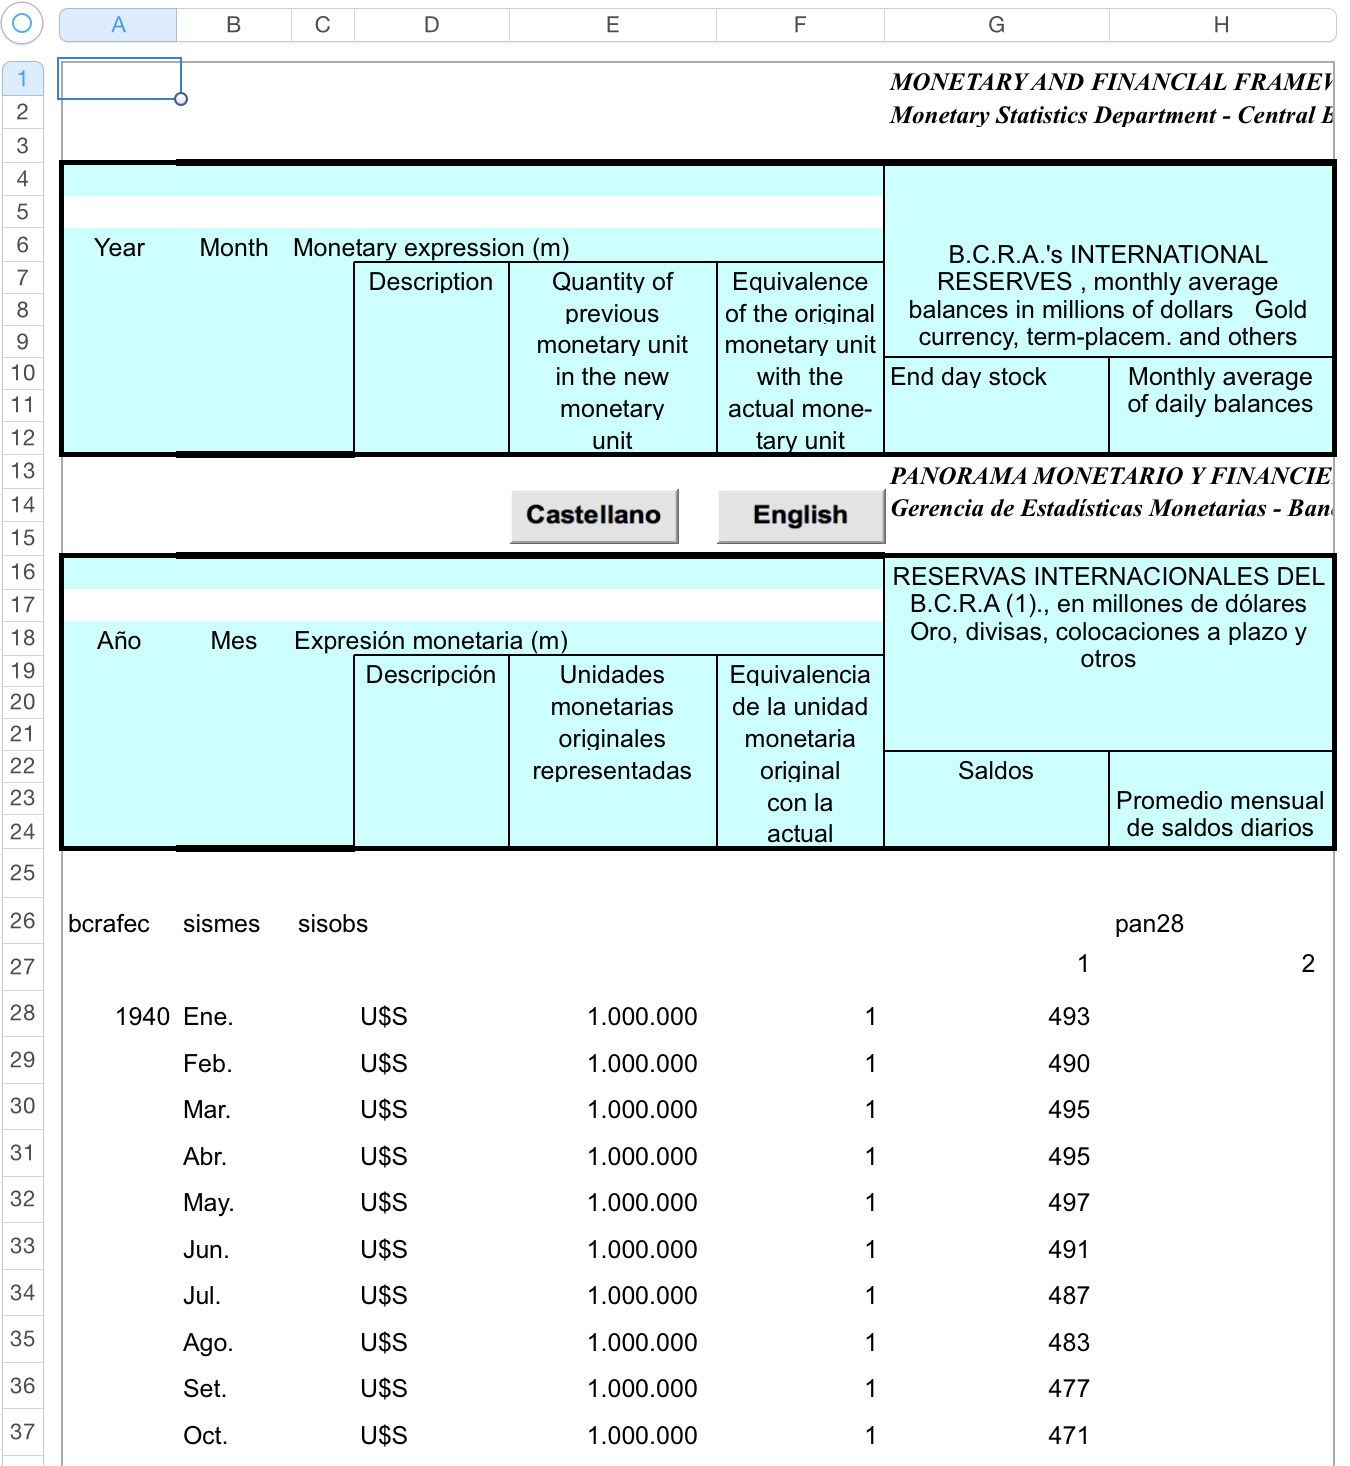

In [22]:
# load excel file to parse 
wb = load_original_case(5)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("5_a"), width=600)

In [23]:
# load parameters to tell the parser how to do it
params = load_critical_parameters_case(5)
pp(params)

{'alignment': None,
 'blank_rows': None,
 'continuity': None,
 'data_ends': [None, None],
 'data_starts': [28, 28],
 'frequency': [u'M', u'M'],
 'headers_coord': [u'G22', u'H22'],
 'missing_value': None,
 'missings': None,
 'series_names': [None, None],
 'time_alignment': [0, 0],
 'time_composed': None,
 'time_header_coord': [u'A18', u'A18'],
 'time_multicolumn': None}


In [24]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 1


In [25]:
df = dfs[0]  # [Number of data frame]
df.head()  # first 5 rows

,Saldos,Promedio mensual de saldos diarios
1940-01,492.8,NaN
1940-02,490.1,NaN
1940-03,495.4,NaN
1940-04,494.9,NaN
1940-05,496.5,NaN


In [26]:
df.tail()  # last 5 rows

,Saldos,Promedio mensual de saldos diarios
2014-08,NaN,NaN
2014-09,NaN,NaN
2014-10,NaN,NaN
2014-11,NaN,NaN
2014-12,NaN,NaN


## Test case 6

*Let's load and take a look of the inputs first*

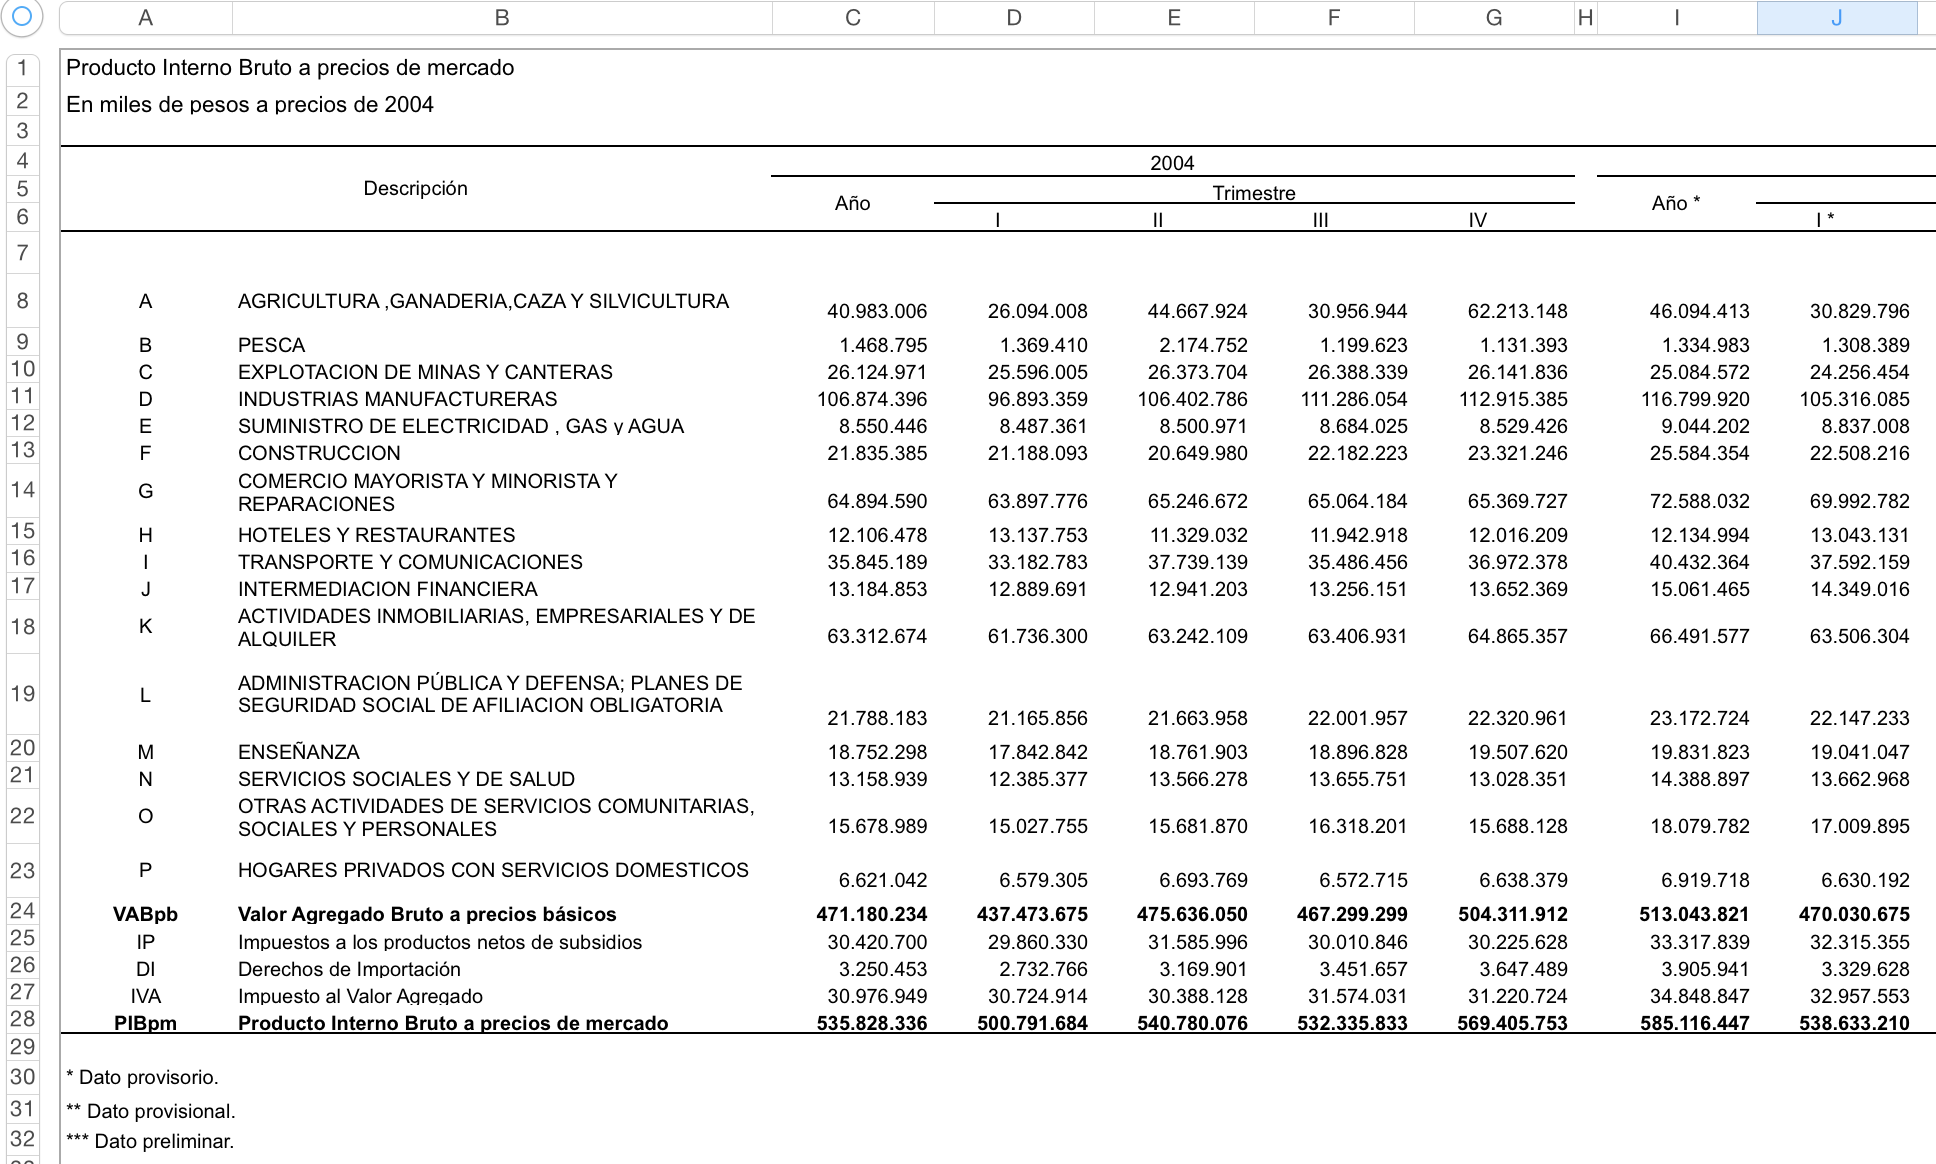

In [27]:
# load excel file to parse 
wb = load_original_case(6)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("6_a"), width=900)

In [28]:
# remember that you can also use a path to a json file
params = get_param_cases_path(6)
params

u'/Users/abenassi/github/xlseries/tests/integration_cases/parameters/test_case6.json'

In [29]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 2


In [30]:
df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,"AGRICULTURA ,GANADERIA,CAZA Y SILVICULTURA",PESCA,EXPLOTACION DE MINAS Y CANTERAS,INDUSTRIAS MANUFACTURERAS,"SUMINISTRO DE ELECTRICIDAD , GAS y AGUA",CONSTRUCCION,COMERCIO MAYORISTA Y MINORISTA Y REPARACIONES,HOTELES Y RESTAURANTES,TRANSPORTE Y COMUNICACIONES,INTERMEDIACION FINANCIERA,...,ADMINISTRACION PUBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACION OBLIGATORIA,ENSENANZA,SERVICIOS SOCIALES Y DE SALUD,"OTRAS ACTIVIDADES DE SERVICIOS COMUNITARIAS, SOCIALES Y PERSONALES",HOGARES PRIVADOS CON SERVICIOS DOMESTICOS,Valor Agregado Bruto a precios basicos,Impuestos a los productos netos de subsidios,Derechos de Importacion,Impuesto al Valor Agregado,Producto Interno Bruto a precios de mercado
2004,40983005.845685,1468794.578528,26124971.004624,1.068744e+08,8550445.980278,21835385.442066,6.489459e+07,12106478.013250,35845188.690381,13184853.443288,...,21788183.118675,18752298.181780,13158939.408298,15678988.518174,6621041.930818,4.711802e+08,30420699.768992,3250453.447630,30976949.123732,5.358283e+08
2005,46094412.644499,1334982.772232,25084572.425075,1.167999e+08,9044202.489656,25584354.115730,7.258803e+07,12134993.967786,40432364.330104,15061464.858270,...,23172723.593740,19831823.199503,14388896.552175,18079782.496554,6919718.228948,5.130438e+08,33317838.602421,3905940.902879,34848846.847206,5.851164e+08
2006,47499039.689610,2136858.589771,26775064.733375,1.282071e+08,9562006.500000,29595153.339468,8.049931e+07,12492929.917778,44709007.131783,17515290.772198,...,24331923.607616,20660595.095815,14778885.407018,19960218.714475,7188238.313608,5.560242e+08,35540065.876824,4483039.609829,38007843.258676,6.340551e+08
2007,50610713.150297,1920212.773102,25114438.211733,1.385620e+08,10147199.448120,32508782.364246,9.094939e+07,13579556.827499,50203810.012943,20273347.031571,...,25540026.514719,21734239.787086,15666878.995306,21333074.161283,7516307.996523,5.988463e+08,38736740.229038,5430874.821690,41783936.676171,6.847979e+08
2008,44596694.840768,2020509.715547,24535358.046939,1.430205e+08,10384537.307810,32996413.692518,9.782299e+07,14666933.593650,53437259.981926,21903760.462428,...,26721243.200753,22743343.626929,16721858.643452,22199561.974920,6787821.199190,6.163855e+08,38947933.985749,6120354.678876,44587254.993124,7.060411e+08
2009,42303666.175723,1618234.894744,25774471.230144,1.407835e+08,10259888.124923,31769771.750000,9.372513e+07,15635389.057765,53168580.305430,23138579.547783,...,27571257.001220,23674885.670343,17920409.837964,24017985.789737,7022321.248663,6.157313e+08,38499047.035614,4986751.713272,47180681.780015,7.063977e+08
2010,49044106.109208,1661063.669666,26361180.190009,1.568163e+08,10677008.566166,33654777.420523,1.081636e+08,17216812.906729,58737842.983941,25198183.128058,...,28850299.169836,25084606.761048,18801009.023081,24805491.352506,7061773.004487,6.731877e+08,40861853.510818,6674854.142424,50211577.038486,7.709359e+08
2011,47452298.923240,1746740.317532,25945347.247551,1.747549e+08,11245879.050958,36811786.763276,1.256811e+08,19093219.566983,63600478.827937,30221812.485695,...,29879556.518309,26291059.223935,19778665.483215,26501796.501834,7044443.587941,7.303952e+08,42987702.718835,8109538.933018,55396405.600100,8.368888e+08
2012,44267023.414321,1756109.607512,25101558.782697,1.719851e+08,11584315.069588,35871899.868821,1.268918e+08,20170143.482765,64462763.004028,35285734.373231,...,31026112.116396,27440132.099787,20617504.405385,27400377.872360,7730224.156254,7.364058e+08,42582580.699183,7655340.961693,58163731.325633,8.448075e+08
2013,48975775.089914,2155796.356429,24707175.291215,1.714714e+08,11918202.741530,36777539.766100,1.292154e+08,21046448.298517,66213233.099962,42689262.272211,...,32122728.324143,28373240.469543,21305453.611084,28385141.474284,7927467.181709,7.586812e+08,42662697.463283,7843288.883841,60552256.992272,8.697395e+08


## Test case 7

*Let's load and take a look of the inputs first*

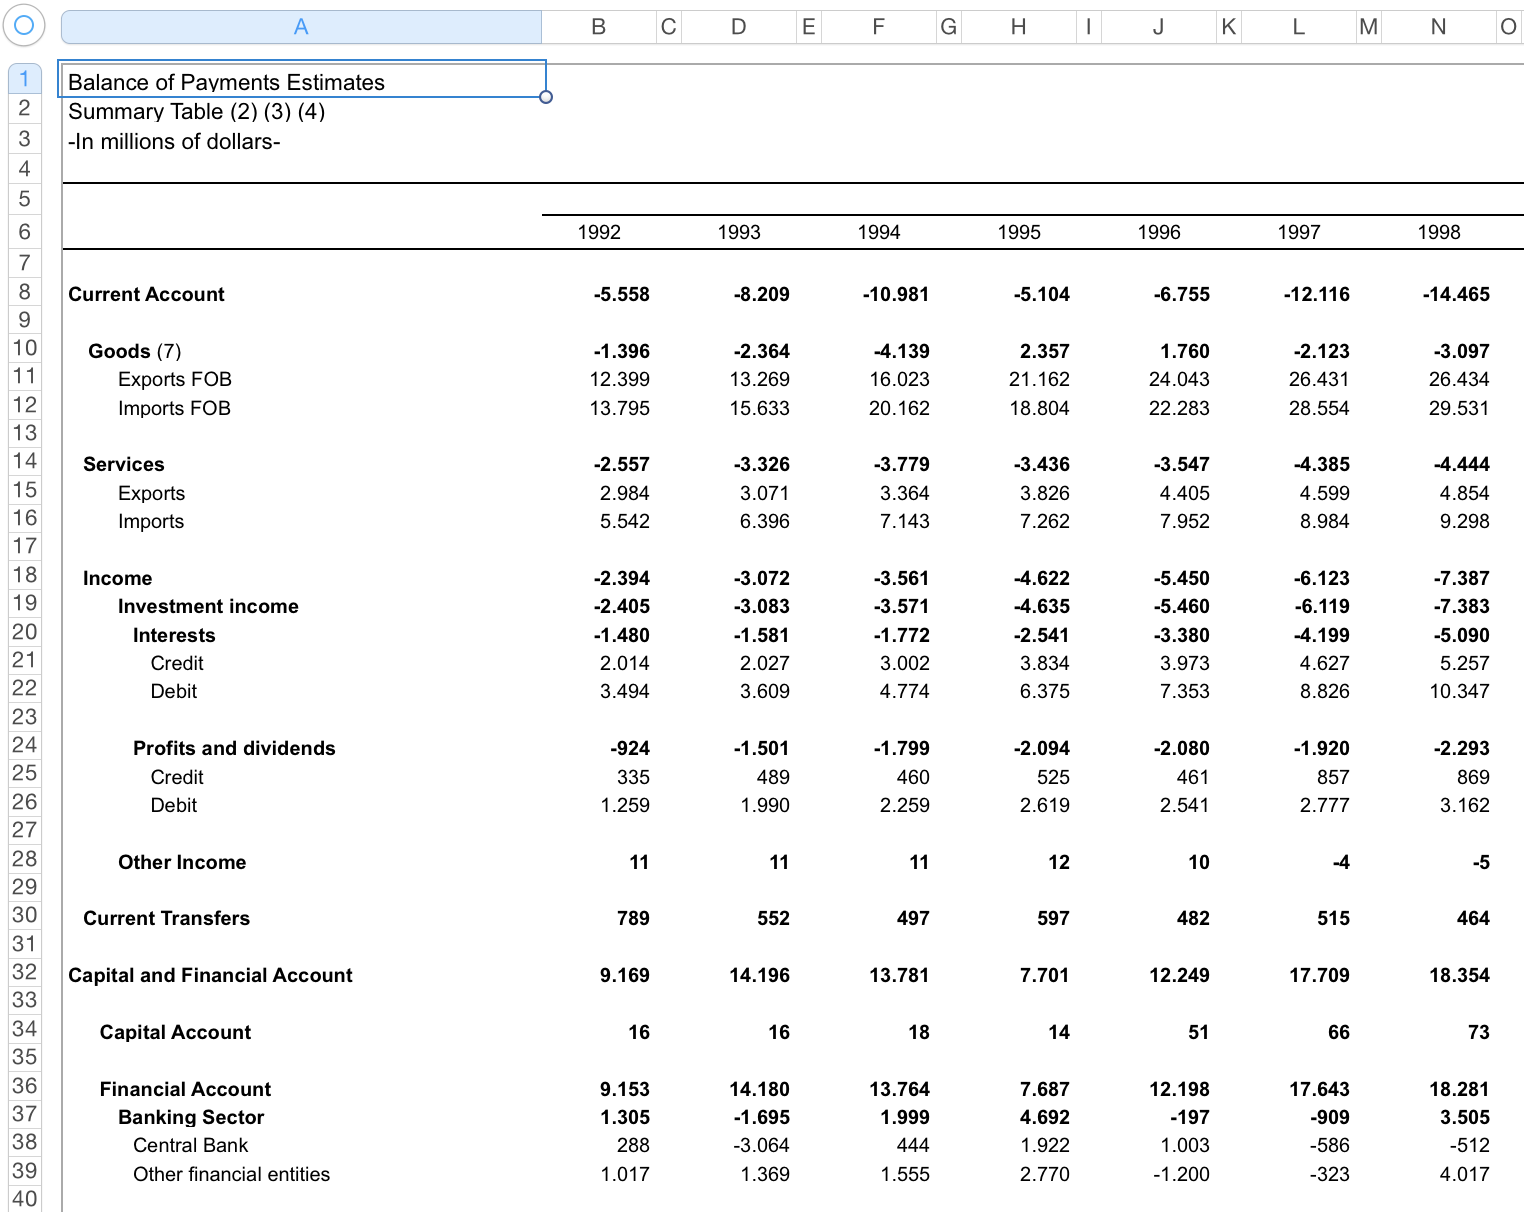

In [31]:
# load excel file to parse 
wb = load_original_case(7)

# plot a screenshot of the excel file
Image(filename=get_screenshot_cases_path("7_a"), width=700)

In [36]:
# this one looks like a complicated one, but really it's not
params = { 
    "time_header_coord": "A6", 
    "frequency": "Y", 
    "data_starts": 2, 
    "headers_coord": [
        "A8", 
        "A10-A12", 
        "A14-A16", 
        "A18-A22", 
        "A24-A26", 
        "A28", 
        "A30", 
        "A32", 
        "A34", 
        "A36-A39", 
        "A41-A44", 
        "A46", 
        "A48", 
        "A50-A52", 
        "A55"
    ]
}
# look! you can use ranges of cells instead of specifying all the individual headers
# just don't include blank rows!

In [37]:
# scrape time data series into pandas data frames
series = XlSeries(wb)
dfs = series.get_data_frames(params)

print "Number of data frames parsed:", len(dfs)

Number of data frames parsed: 1


In [38]:
df = dfs[0]  # [Number of data frame]
df[:10]  # [Slicing data frame rows]

,Current Account,Goods (7),Exports FOB,Imports FOB,Services,Exports,Imports,Income,Investment income,Interests,...,Nonfinancial Public Sector,National Government (5) (6),Local Governments,Companies and other,Nonfinancial Private Sector,Net Errors and Omissions,International Reserves Variation,BCRA International Reserves,Exchange rate adjustment,Imports CIF
1992,-5557.754559,-1395.9,12398.9,13794.8,-2557.400000,2984.300000,5541.700000,-2393.654559,-2404.654559,-1480.477299,...,796.092500,1351.792500,43.300000,-599.000000,7052.507031,-337.222672,3274.1,3105.1,-169.0,14981.7
1993,-8208.889940,-2363.6,13268.9,15632.5,-3325.640000,3070.560000,6396.200000,-3071.849940,-3082.549940,-1581.435709,...,7013.607500,6375.607500,879.000000,-241.000000,8861.209723,-1736.644282,4250.4,4480.4,230.0,16872.3
1994,-10981.452970,-4138.9,16023.3,20162.2,-3779.000000,3364.100000,7143.100000,-3560.752970,-3571.252970,-1771.915315,...,3994.059500,4367.059500,190.000000,-563.000000,7770.553649,-2117.965179,682.0,561.0,-121.0,21675.1
1995,-5104.172254,2357.4,21161.7,18804.3,-3436.100000,3825.600000,7261.700000,-4622.272254,-4634.572254,-2540.707075,...,5854.863274,6324.863274,394.000000,-864.000000,-2859.857580,-2699.123440,-102.0,-69.0,33.0,20199.7
1996,-6755.412694,1759.5,24042.7,22283.2,-3546.949424,4405.354642,7952.304066,-5450.163270,-5459.963270,-3379.972717,...,9024.017151,8755.017151,733.000000,-464.000000,3371.061349,-1611.420806,3882.0,3782.0,-100.0,23855.1
1997,-12115.533960,-2122.7,26430.8,28553.5,-4385.115237,4598.771471,8983.886709,-6122.576294,-6118.976294,-4199.041156,...,8162.665496,6805.665496,1733.000000,-376.000000,10389.394049,-2320.556508,3273.0,3062.0,-211.0,30450.2
1998,-14464.598042,-3097.2,26433.7,29530.9,-4444.347974,4854.069563,9298.417537,-7387.118270,-7382.618270,-5089.541051,...,9361.252670,9525.252670,148.800000,-312.800000,5414.341277,-451.100059,3438.0,3442.0,4.0,31377.4
1999,-11909.644611,-794.6,23308.6,24103.2,-4111.158056,4718.718725,8829.876781,-7457.196620,-7468.296620,-5852.495418,...,10885.914660,10108.214660,1364.100000,-586.400000,1407.161251,-661.688494,1200.8,1093.2,-107.6,25508.2
2000,-8954.517893,2451.9,26341.0,23889.1,-4283.783472,4935.520315,9219.303787,-7521.670369,-7529.814027,-5920.543888,...,8252.865463,7408.965463,1276.400000,-432.500000,305.376341,-216.438596,-439.4,-424.0,15.4,25280.5
2001,-3780.435241,7384.9,26542.7,19157.8,-3863.089356,4627.053077,8490.142433,-7726.740702,-7730.940702,-7472.708603,...,-3388.069011,-2925.614391,-58.621782,-403.832838,-13797.702330,-2861.416154,-12083.4,-12004.6,78.8,20319.6
